In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
# Read in Alzheimer Prediction Dataset
df = pd.read_csv("alzheimers_prediction_dataset.csv")
# View first 5 Entries
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [72]:
print(df.shape) 
df.info()

(74283, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Fam

In [73]:
# View if missnig
df.isna().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [74]:
df.duplicated().sum()

np.int64(0)

In [75]:
df.describe(include='object')

,Country,Gender,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Depression Level,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
count,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,...,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283
unique,20,2,3,3,3,2,2,2,2,3,...,3,3,3,3,2,3,3,3,2,2
top,Brazil,Female,High,Current,Never,No,No,Normal,No,Medium,...,Average,High,Unemployed,Single,No,Medium,Low,Medium,Rural,No
freq,3839,37249,24853,24915,24865,59527,52134,51973,52004,24843,...,24917,24906,24801,25169,59561,24859,24873,24886,37203,43570


In [76]:
# Add categorical values to dictionary to view categories of all columns
categories = {}

for col in list(df.select_dtypes(include='object').columns):
    categories.update({col : list(df[col].value_counts().index)})

categories


{'Country': ['Brazil',
  'Germany',
  'Australia',
  'Russia',
  'South Africa',
  'Japan',
  'India',
  'South Korea',
  'Argentina',
  'Italy',
  'Canada',
  'France',
  'Norway',
  'Spain',
  'Sweden',
  'Saudi Arabia',
  'UK',
  'USA',
  'Mexico',
  'China'],
 'Gender': ['Female', 'Male'],
 'Physical Activity Level': ['High', 'Low', 'Medium'],
 'Smoking Status': ['Current', 'Never', 'Former'],
 'Alcohol Consumption': ['Never', 'Regularly', 'Occasionally'],
 'Diabetes': ['No', 'Yes'],
 'Hypertension': ['No', 'Yes'],
 'Cholesterol Level': ['Normal', 'High'],
 'Family History of Alzheimer’s': ['No', 'Yes'],
 'Depression Level': ['Medium', 'Low', 'High'],
 'Sleep Quality': ['Good', 'Average', 'Poor'],
 'Dietary Habits': ['Average', 'Healthy', 'Unhealthy'],
 'Air Pollution Exposure': ['High', 'Medium', 'Low'],
 'Employment Status': ['Unemployed', 'Employed', 'Retired'],
 'Marital Status': ['Single', 'Married', 'Widowed'],
 'Genetic Risk Factor (APOE-ε4 allele)': ['No', 'Yes'],
 'Social 

In [77]:
df.iloc[:, 5:25].head()


,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Cognitive Test Score,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Medium,Never,Occasionally,No,No,Normal,No,90,Low,Poor,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Medium,Former,Never,No,No,Normal,No,65,Low,Good,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,High,Current,Occasionally,No,Yes,Normal,No,43,High,Good,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,Low,Never,Regularly,Yes,No,Normal,No,81,Medium,Average,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,High,Former,Never,Yes,No,Normal,No,49,High,Poor,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [78]:
# Dropping Variables 
df_alz = df.drop(['Education Level', 'Country'], axis=1)

df_alz.head()

,Age,Gender,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,90,Male,33.0,Medium,Never,Occasionally,No,No,Normal,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,72,Male,29.9,Medium,Former,Never,No,No,Normal,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,86,Female,22.9,High,Current,Occasionally,No,Yes,Normal,No,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,53,Male,31.2,Low,Never,Regularly,Yes,No,Normal,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,58,Female,30.0,High,Former,Never,Yes,No,Normal,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


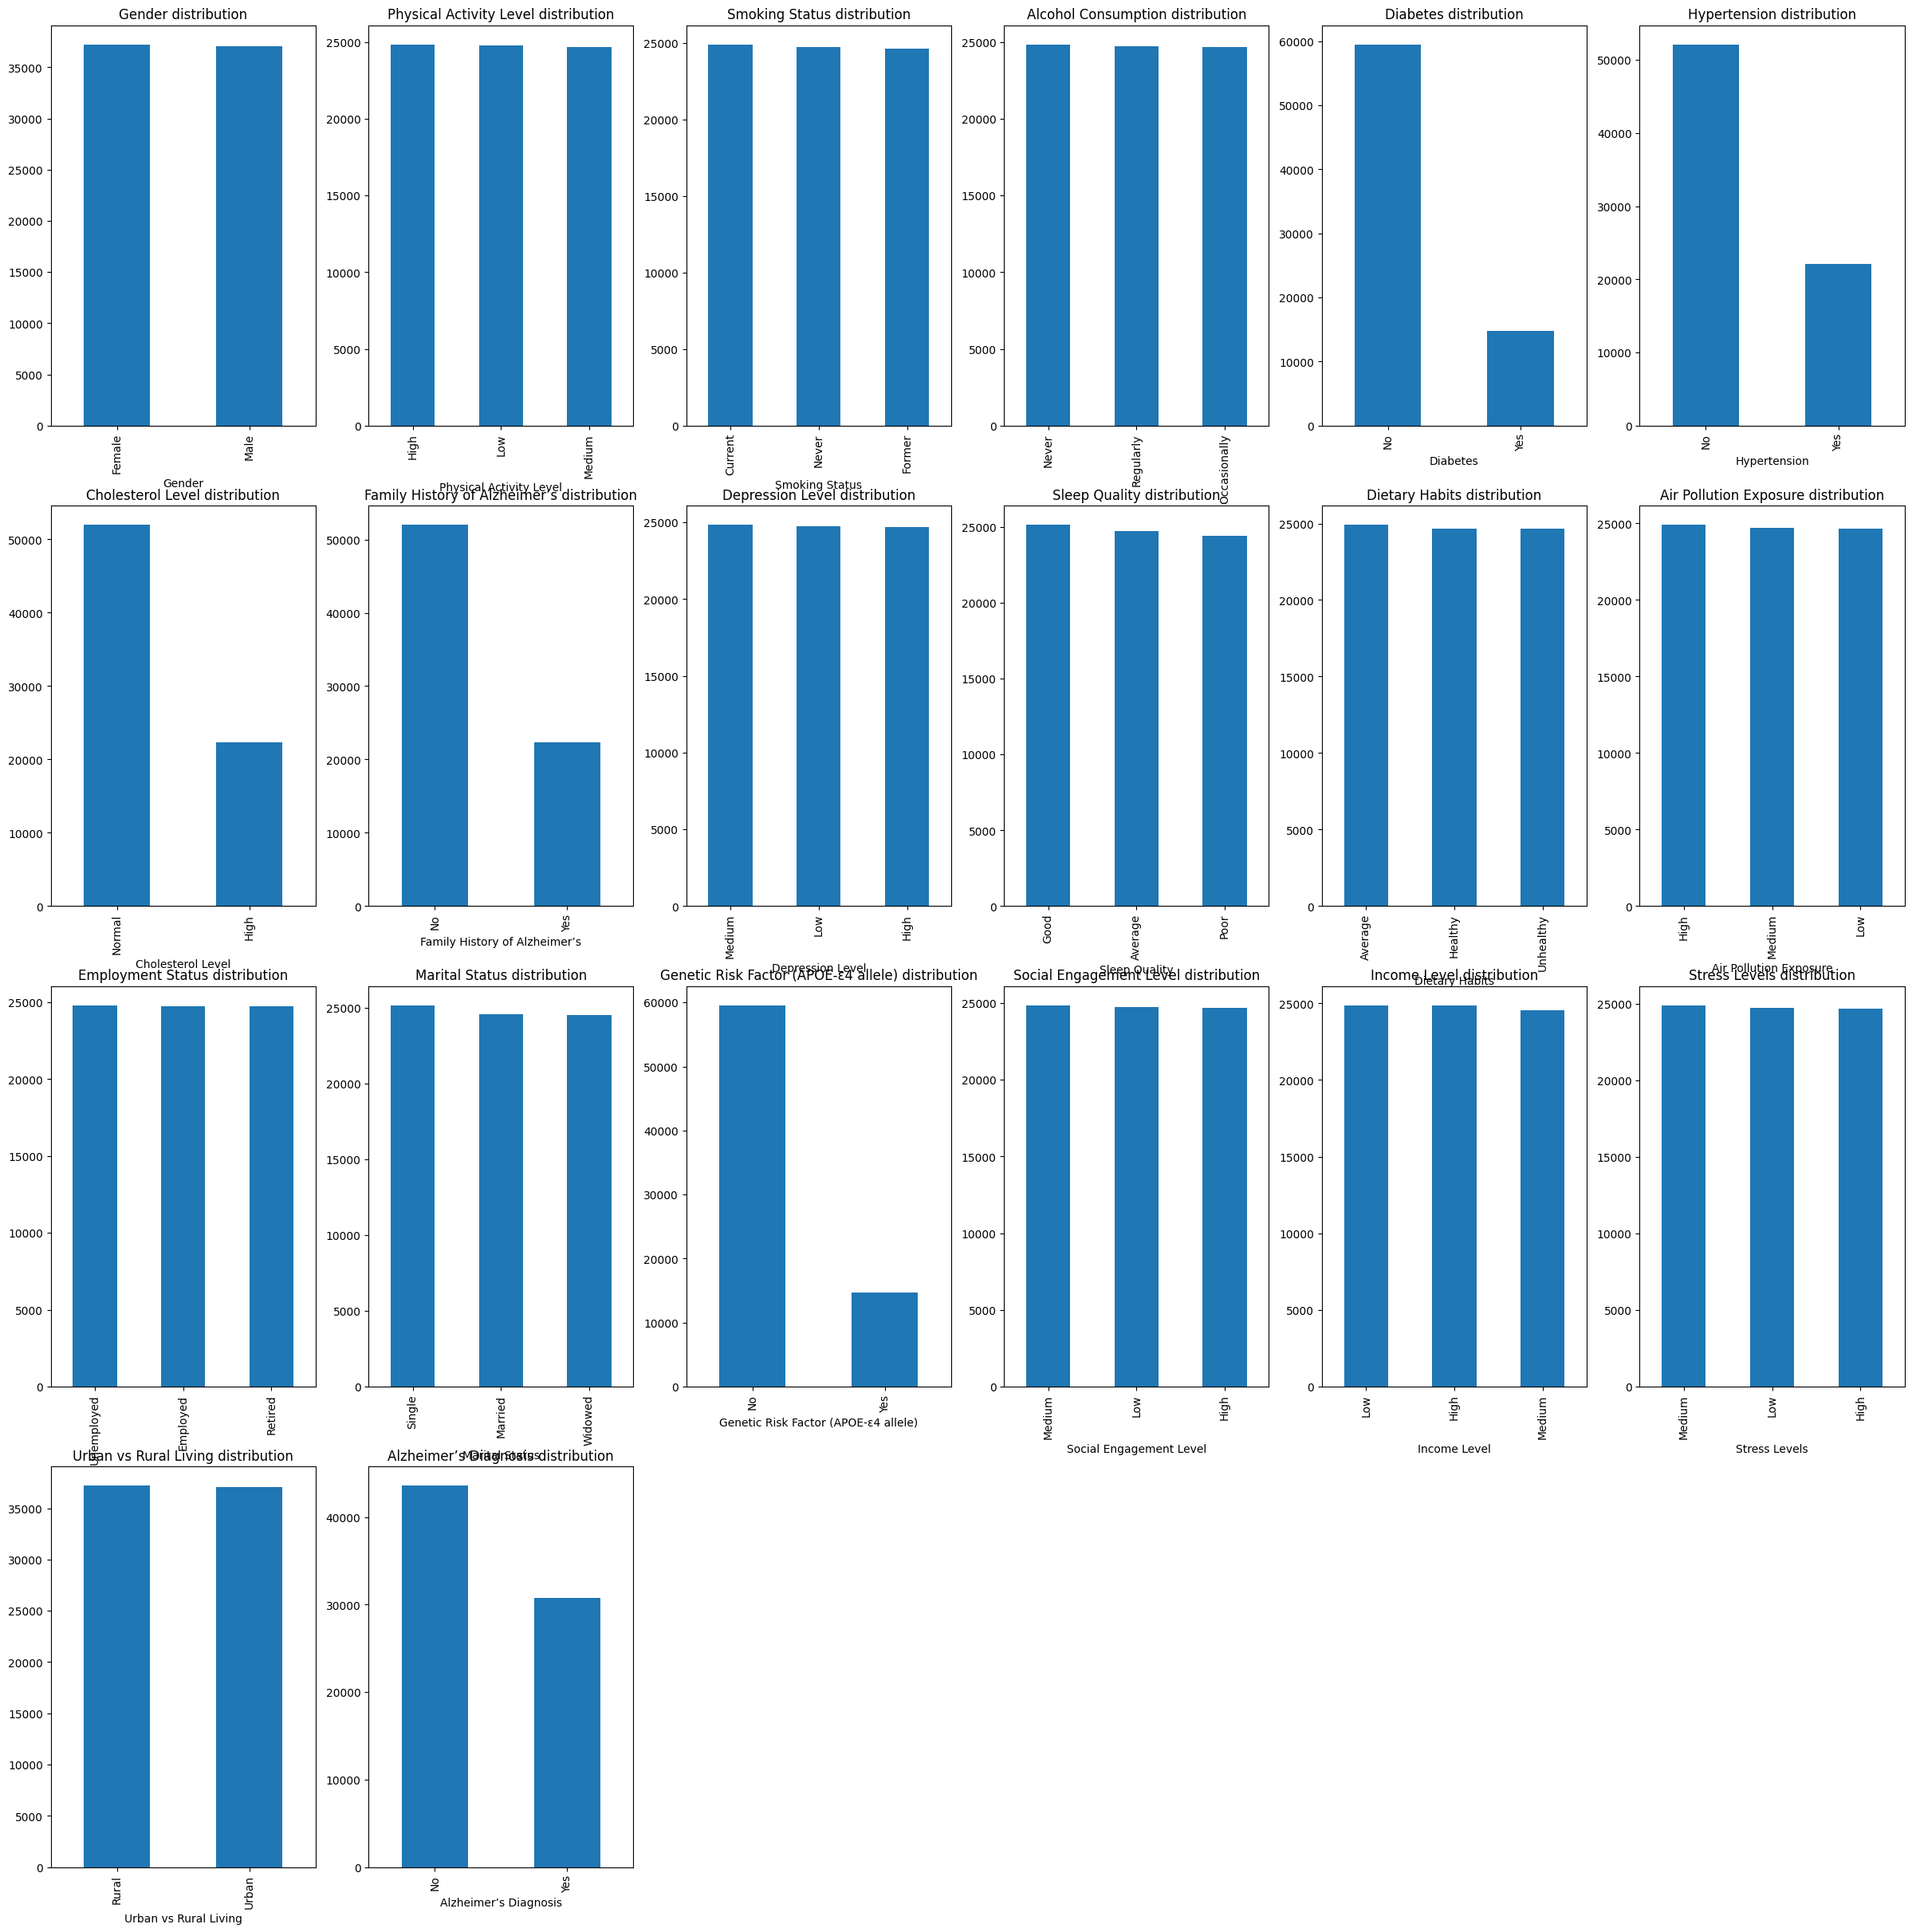

In [79]:
columns = list(df_alz.select_dtypes(include='object').columns)

plt.figure(figsize=(30, 30))
for i, cols in enumerate(columns, start=1):
    plt.subplot(4, 6, i)
    df_alz[cols].value_counts().plot(kind='bar')
    
    plt.title(f"{cols} distribution") 


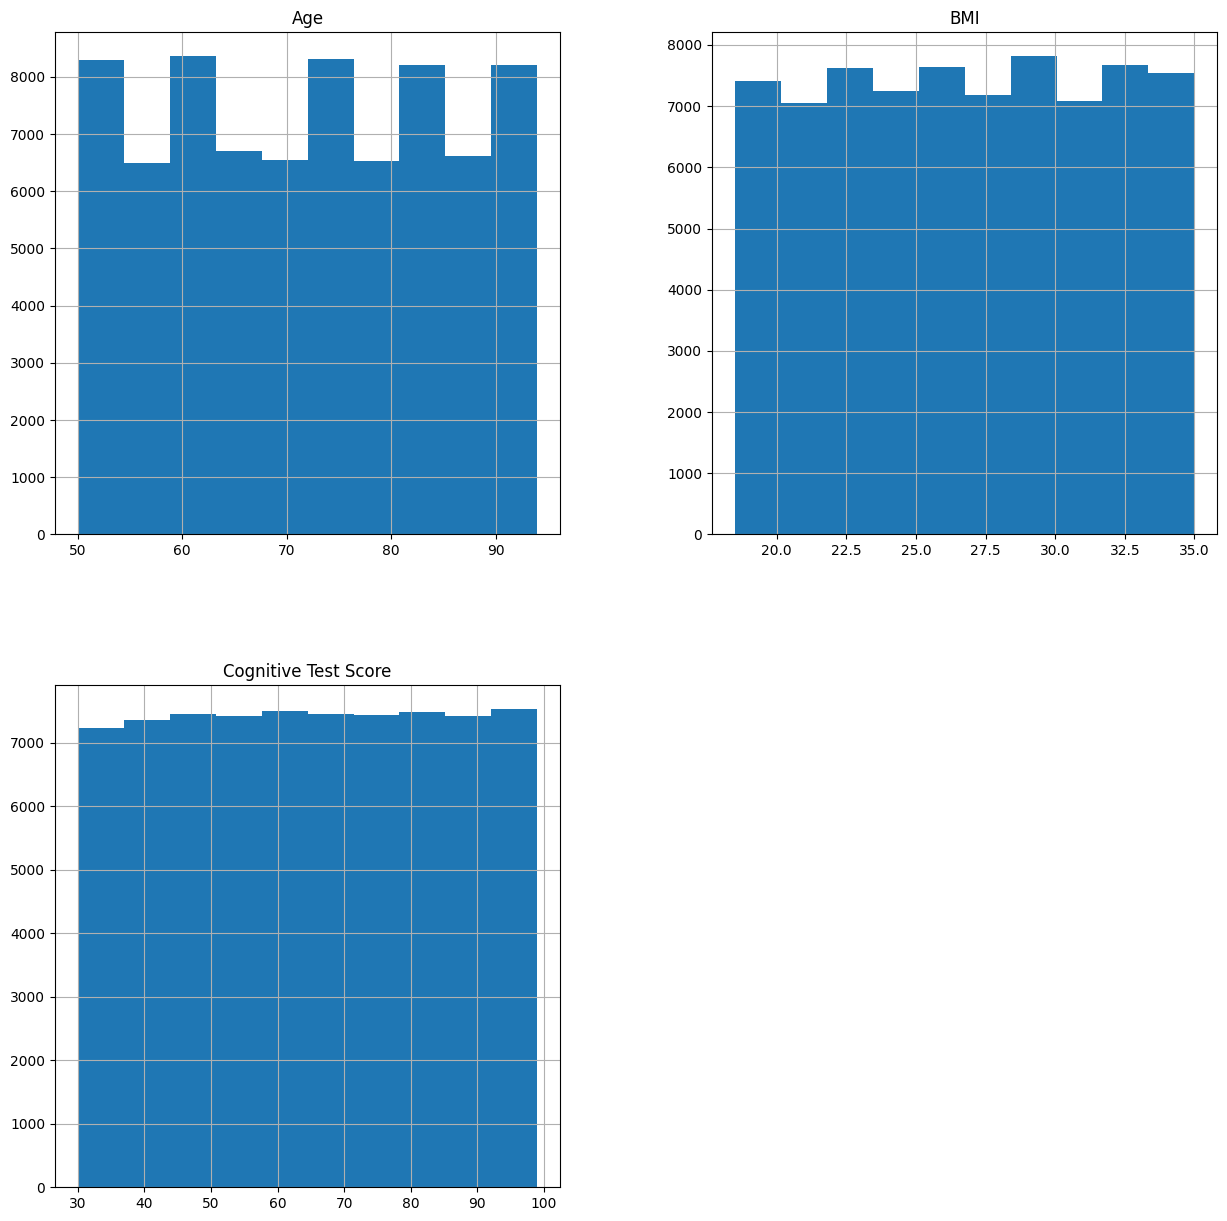

In [80]:
df[list(df_alz.select_dtypes(exclude='object'))].hist(figsize=(15, 15))
plt.show()

In [81]:
group = df_alz.groupby('Alzheimer’s Diagnosis')['Gender'].value_counts()

group


Alzheimer’s Diagnosis  Gender
No                     Female    21873
                       Male      21697
Yes                    Female    15376
                       Male      15337
Name: count, dtype: int64

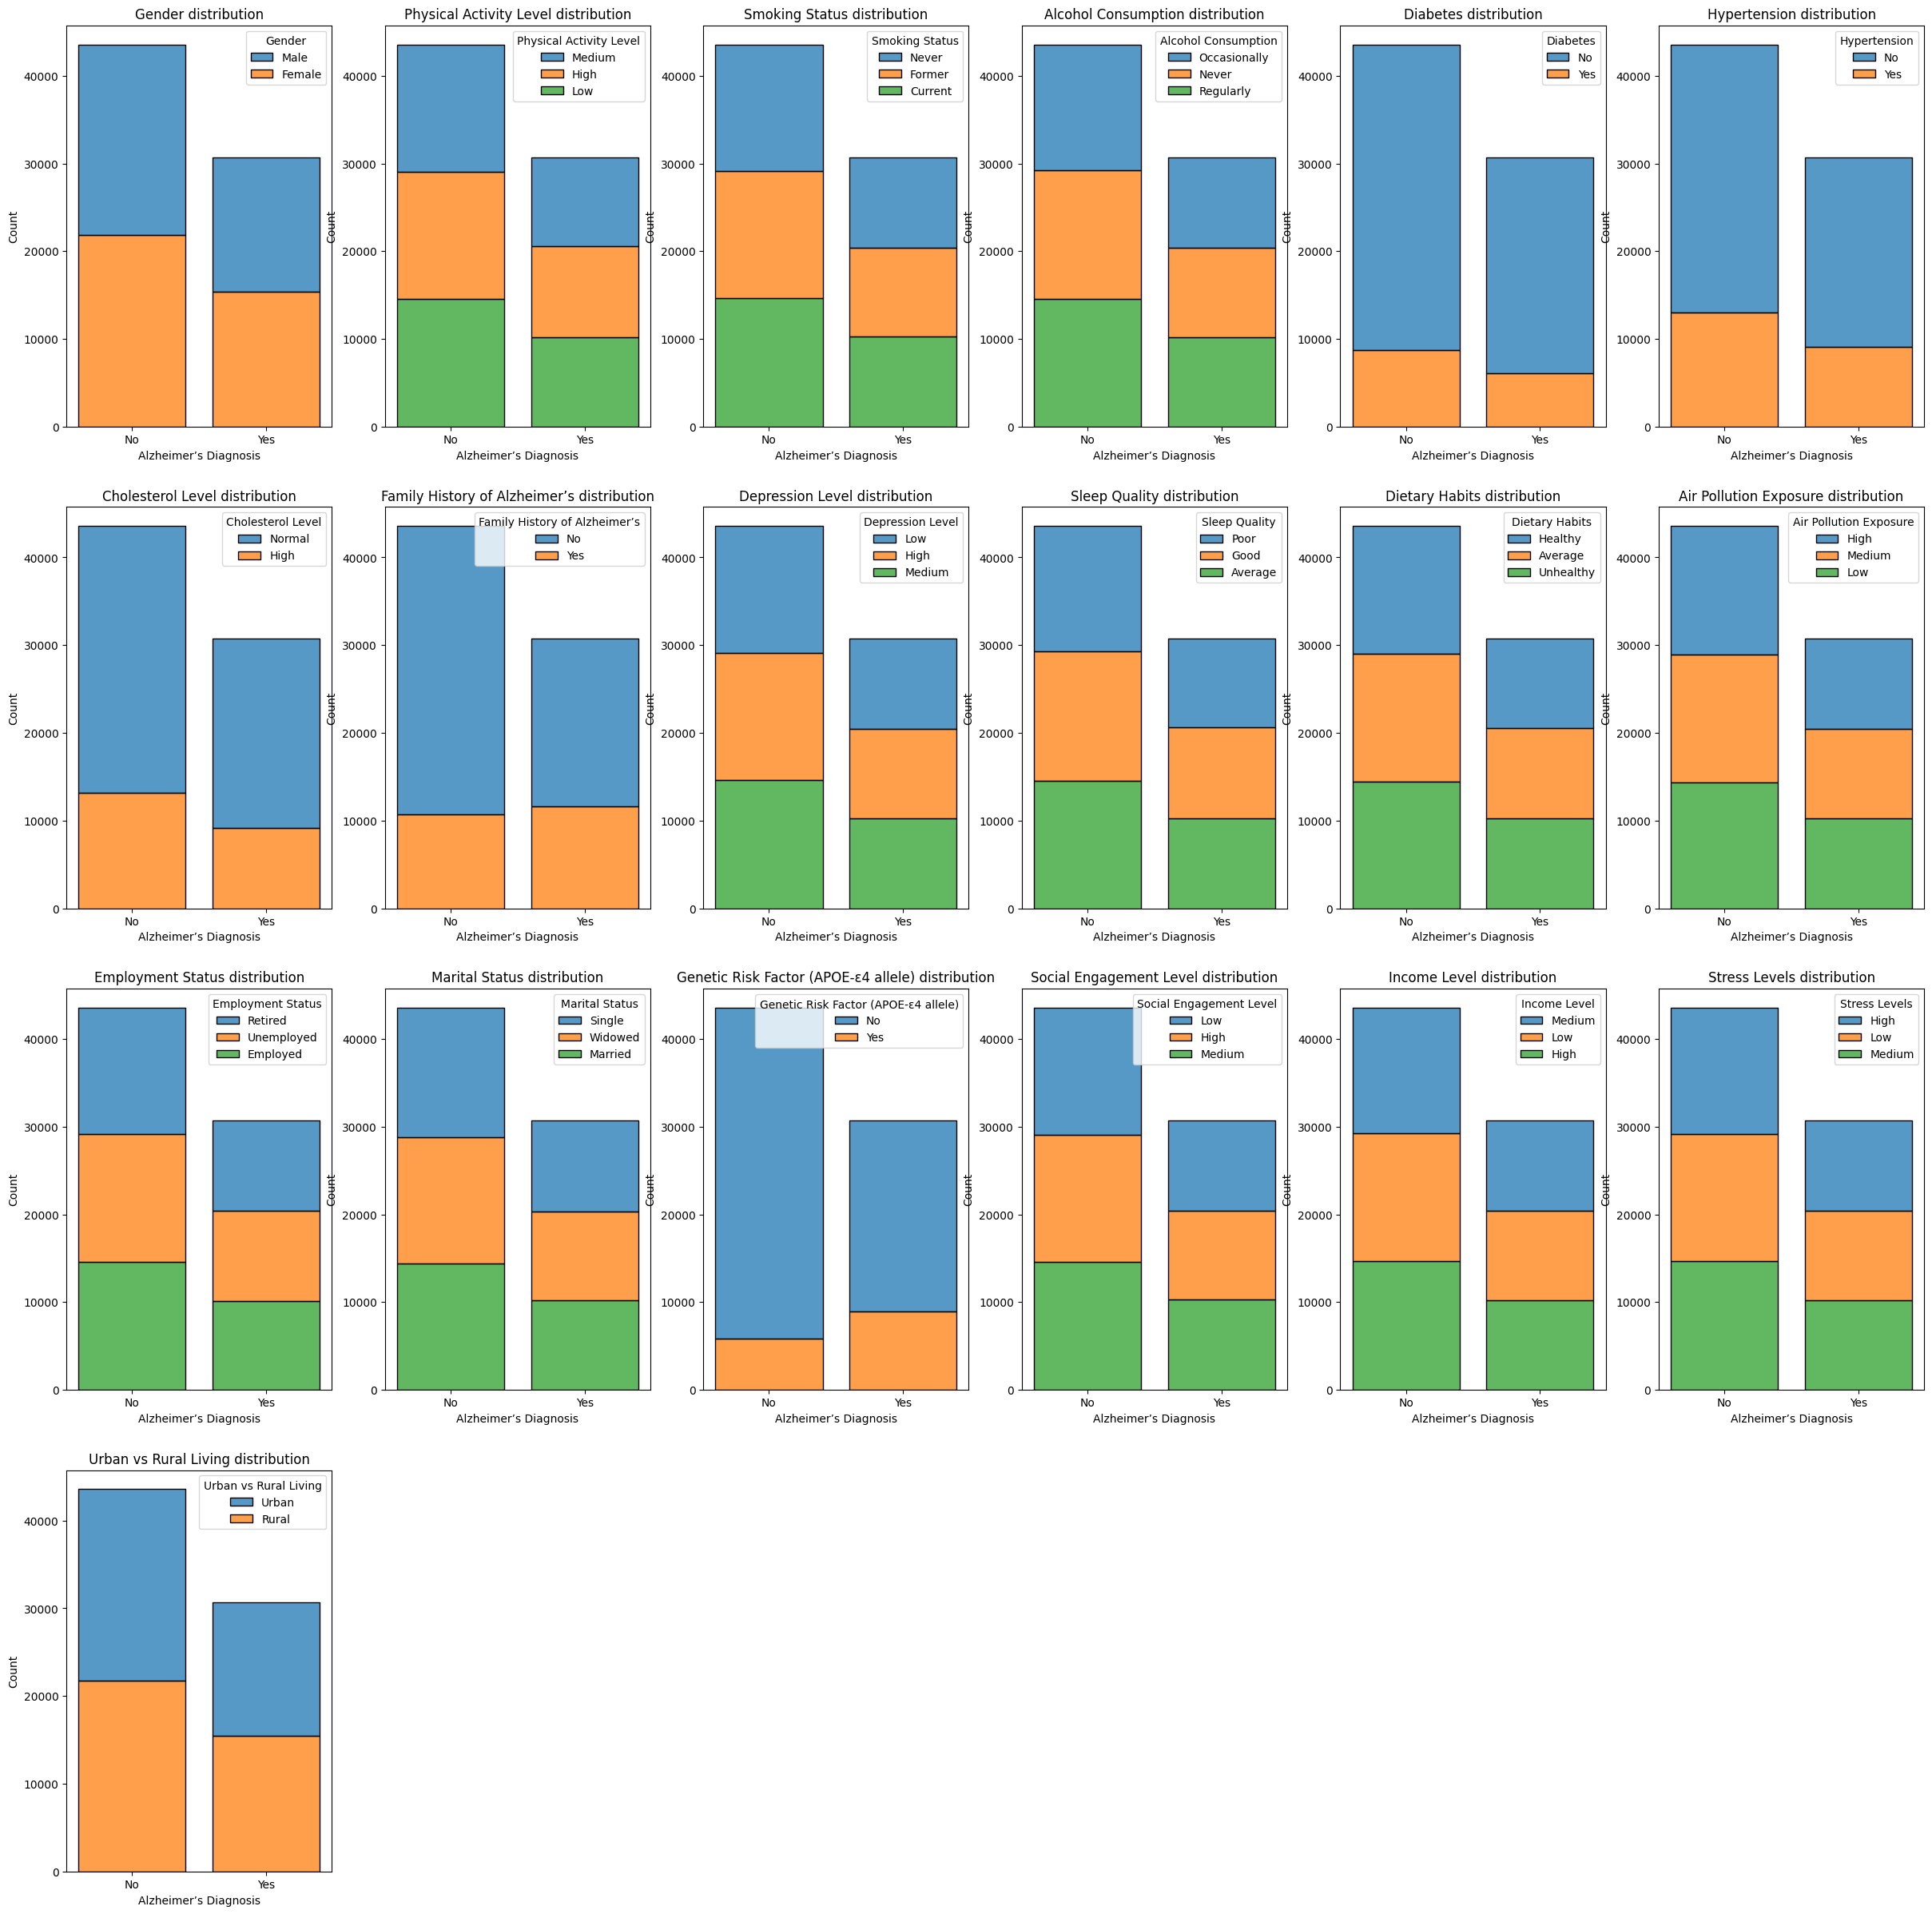

In [82]:
columns = list(df_alz.select_dtypes(include='object').columns)
columns.remove('Alzheimer’s Diagnosis')

plt.figure(figsize=(30, 30))
for i, cols in enumerate(columns, start=1):
    plt.subplot(4, 6, i)
    sns.histplot(data=df_alz, x='Alzheimer’s Diagnosis', hue=cols, multiple='stack', shrink=0.8)
    
    plt.title(f"{cols} distribution") 

In [178]:
df_ad = df_alz[df_alz.loc[:, 'Alzheimer’s Diagnosis'] == "Yes"]

df_ad['Alzheimer’s Diagnosis'].value_counts()

Alzheimer’s Diagnosis
Yes    30713
Name: count, dtype: int64

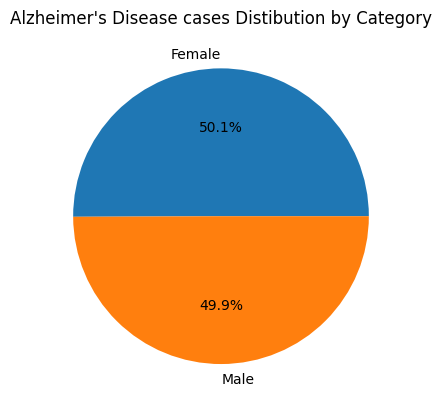

In [187]:
group = df_ad['Gender'].value_counts().reset_index()

sizes = group.iloc[:, 1]
labels = group.iloc[:, 0]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Alzheimer's Disease cases Distibution by Category")
plt.show()


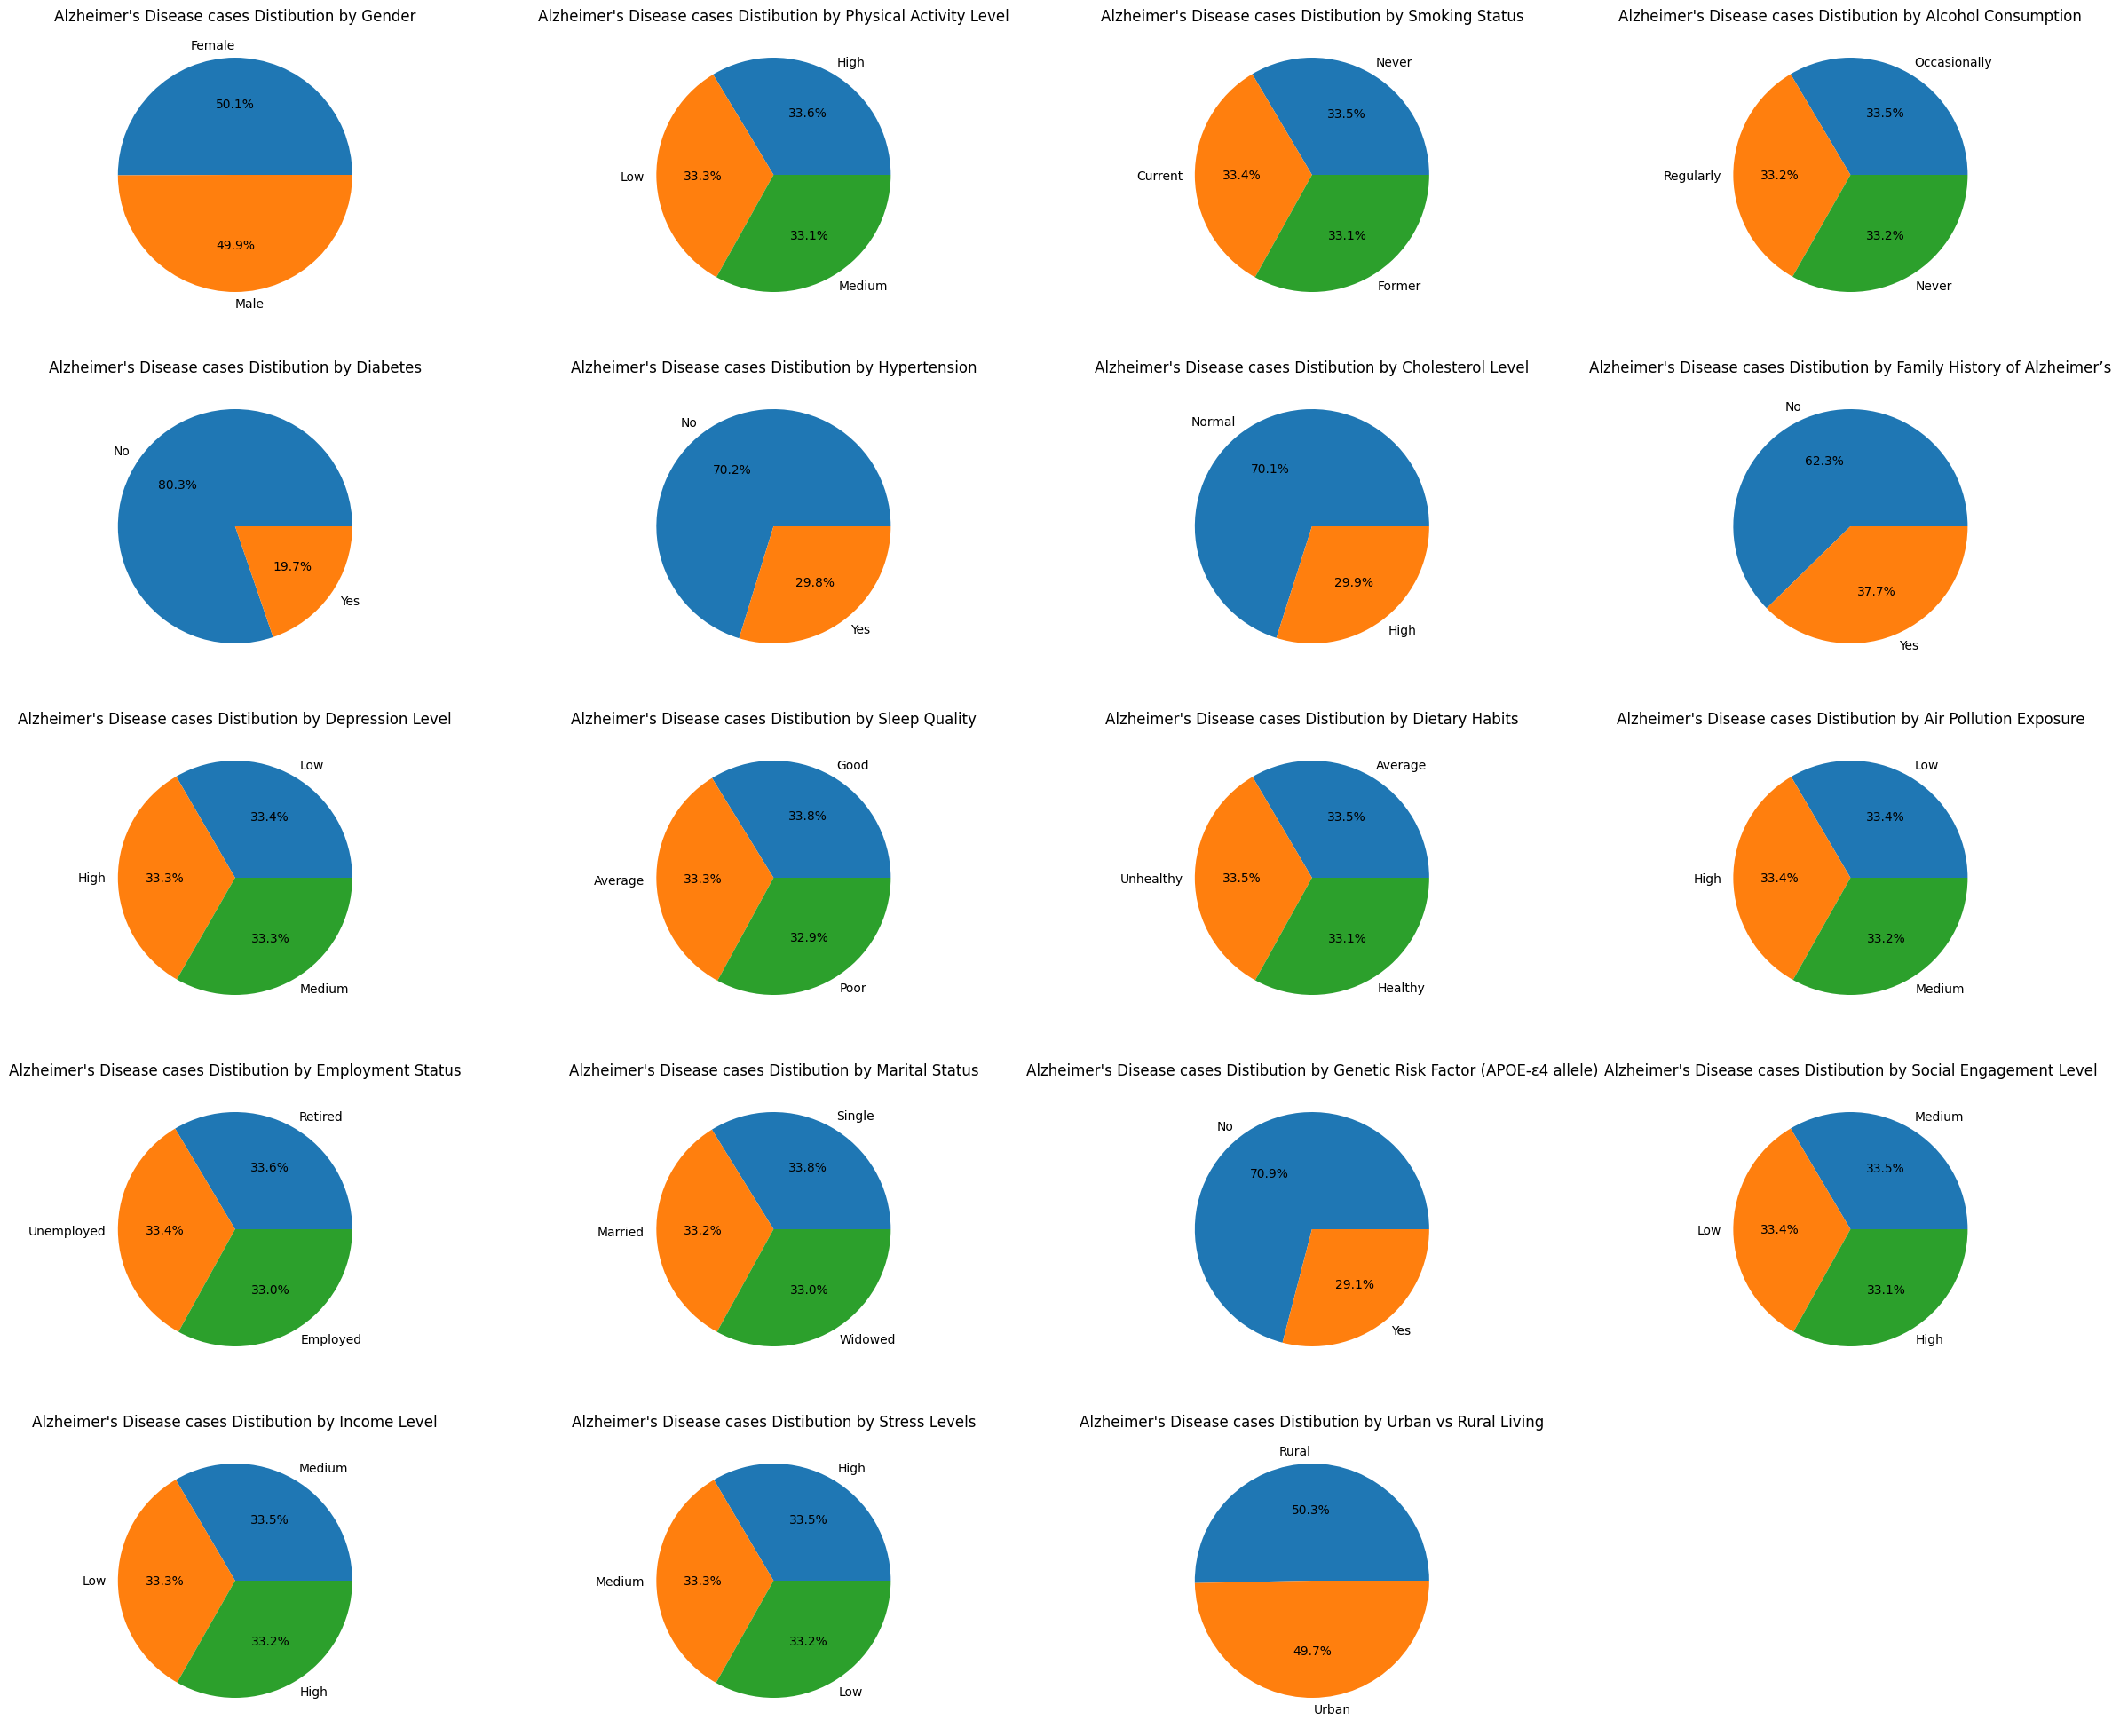

In [189]:
columns = list(df_ad.select_dtypes(include='object').columns)
columns.remove('Alzheimer’s Diagnosis')

plt.figure(figsize=(30, 30))
for i, cols in enumerate(columns, start=1):
    plt.subplot(6, 4, i)
    group = df_ad[cols].value_counts().reset_index()

    sizes = group.iloc[:, 1]
    labels = group.iloc[:, 0]

    plt.pie(sizes, labels=labels, autopct='%1.1f%%')
    plt.title(f"Alzheimer's Disease cases Distibution by {cols}")
    
    
    

In [83]:
family_group = df_alz.groupby('Alzheimer’s Diagnosis')['Family History of Alzheimer’s'].value_counts().reset_index()

family_group

,Alzheimer’s Diagnosis,Family History of Alzheimer’s,count
0,No,No,32864
1,No,Yes,10706
2,Yes,No,19140
3,Yes,Yes,11573


In [84]:
grf_group = df_alz.groupby('Alzheimer’s Diagnosis')['Genetic Risk Factor (APOE-ε4 allele)'].value_counts().reset_index()

grf_group

,Alzheimer’s Diagnosis,Genetic Risk Factor (APOE-ε4 allele),count
0,No,No,37771
1,No,Yes,5799
2,Yes,No,21790
3,Yes,Yes,8923


<Axes: xlabel='Age', ylabel='Count'>

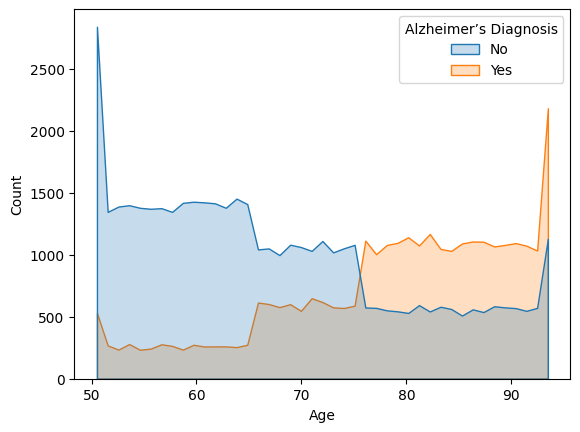

In [85]:
sns.histplot(df_alz, x='Age', hue='Alzheimer’s Diagnosis', element='poly')

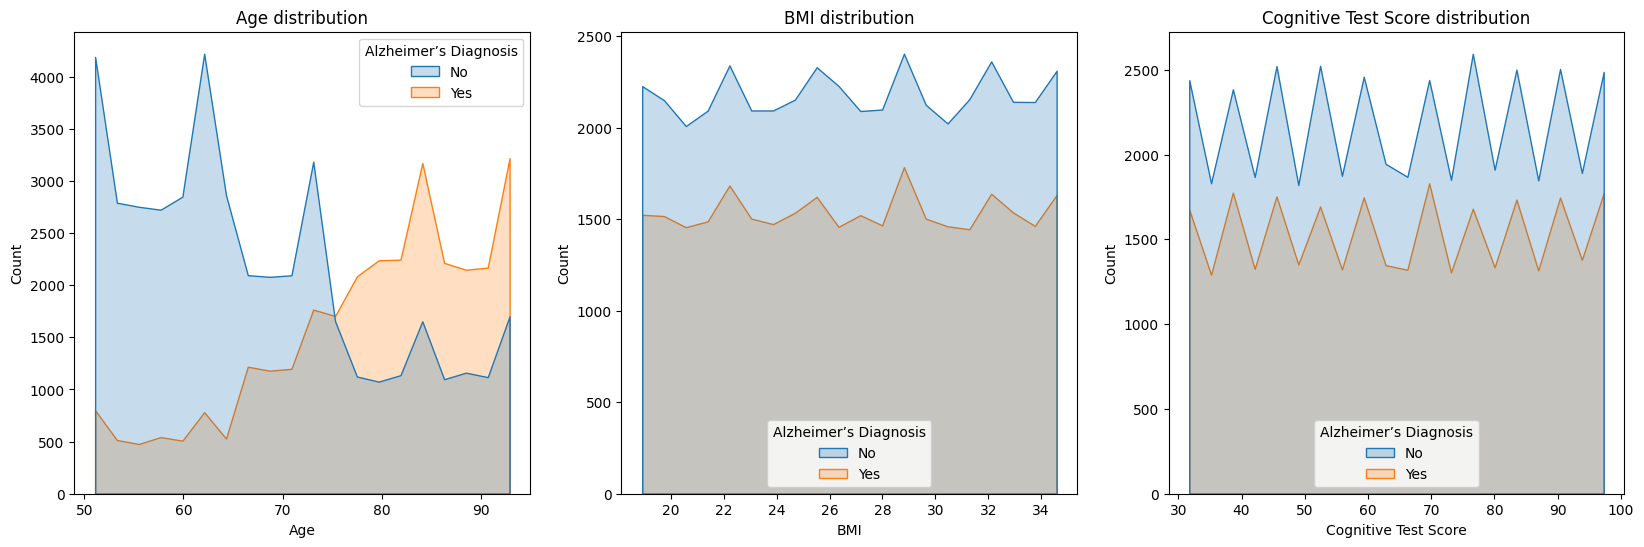

In [86]:
columns = list(df_alz.select_dtypes(exclude='object').columns)


plt.figure(figsize=(20, 6))
for i, cols in enumerate(columns, start=1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df_alz, x=cols, hue='Alzheimer’s Diagnosis', element='poly', bins=20)
    
    plt.title(f"{cols} distribution") 

# Observation from Variables
Family History of Alzheimer's and APOE-E4 Allele are 2 categorical variables / Genetic Factors with a larger counts for a particular factor in Alzheimer diagnosis yes than no
Family History of Alzheimer's Yes and Alzheimer's Disease Yes: 11573 
Family History of Alzheimer's Yes and Alzheimer's Disease No: 10706

Age Shows an increase in distribution of positive Alzheimers diagnosis in later years growing higher than in earlier years

In [58]:
df_alz.loc[:, 'Alzheimer’s Diagnosis']

0        No
1        No
2        No
3        No
4        No
         ..
74278    No
74279    No
74280    No
74281    No
74282    No
Name: Alzheimer’s Diagnosis, Length: 74283, dtype: object

In [87]:
df_check = pd.DataFrame()
df_check

""


In [89]:
df_check['Alzheimer’s Diagnosis'] = np.where(df_alz.loc[:, 'Alzheimer’s Diagnosis'] == "Yes", 1, 0)
df_check['Genetic Risk Factor (APOE-ε4 allele)'] = np.where(df_alz.loc[:, 'Genetic Risk Factor (APOE-ε4 allele)'] == "Yes", 1, 0)
df_check['Family History of Alzheimer’s'] = np.where(df_alz.loc[:, 'Family History of Alzheimer’s'] == "Yes", 1, 0)
df_check['Age'] = df_alz.loc[:, 'Age']

df_check[['Alzheimer’s Diagnosis', 'Family History of Alzheimer’s', 'Genetic Risk Factor (APOE-ε4 allele)', 'Age' ]]


,Alzheimer’s Diagnosis,Family History of Alzheimer’s,Genetic Risk Factor (APOE-ε4 allele),Age
0,0,0,0,90
1,0,0,0,72
2,0,0,0,86
3,0,0,0,53
4,0,0,0,58
...,...,...,...,...
74278,0,0,0,60
74279,0,0,0,58
74280,0,1,1,57
74281,0,0,0,73


In [90]:
df_check[['Alzheimer’s Diagnosis', 'Family History of Alzheimer’s', 'Genetic Risk Factor (APOE-ε4 allele)', 'Age' ]].corr()

,Alzheimer’s Diagnosis,Family History of Alzheimer’s,Genetic Risk Factor (APOE-ε4 allele),Age
Alzheimer’s Diagnosis,1.000000,0.140885,0.194484,0.419923
Family History of Alzheimer’s,0.140885,1.000000,-0.001506,-0.005028
Genetic Risk Factor (APOE-ε4 allele),0.194484,-0.001506,1.000000,0.003470
Age,0.419923,-0.005028,0.003470,1.000000


In [63]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,0,Low,Medium,High,Urban,0
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,0,High,Low,High,Urban,0
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,0,Low,Medium,High,Rural,0
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,0,High,Medium,Low,Rural,0
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,0,Low,Medium,High,Rural,0


In [93]:
df_alz2 = df_alz.copy(deep=True)

In [94]:
columns = list(df_alz.select_dtypes(include='object').columns)

for i, cols in enumerate(columns, start=1):
    df_alz2[cols] = pd.factorize(df_alz[cols])[0]

df_alz2.head()

,Age,Gender,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,90,0,33.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,72,0,29.9,0,1,1,0,0,0,0,...,0,1,1,1,0,1,1,0,0,0
2,86,1,22.9,1,2,0,0,1,0,0,...,1,1,2,0,0,0,0,0,1,0
3,53,0,31.2,2,0,2,1,0,0,0,...,0,1,0,0,0,1,0,1,1,0
4,58,1,30.0,1,1,1,1,0,0,0,...,2,0,2,2,0,0,0,0,1,0


In [99]:
corr = df_alz2.corr()

corr

,Age,Gender,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
Age,1.000000,-0.004039,-0.000135,-0.003939,-0.004626,0.002159,-0.001287,-0.001680,0.003750,-0.005028,...,0.000022,0.001422,-0.005271,0.002976,0.003470,0.003300,-0.004425,-0.000973,-0.002163,0.419923
Gender,-0.004039,1.000000,0.001304,-0.003832,0.000206,0.001021,-0.001441,-0.002387,-0.000252,-0.003628,...,0.006771,-0.003087,0.001747,-0.004052,-0.000493,0.006057,0.000548,0.007687,0.005582,-0.001364
BMI,-0.000135,0.001304,1.000000,-0.003893,-0.002883,0.001713,0.002004,-0.002779,-0.002738,-0.004387,...,-0.002830,0.001315,-0.001218,-0.000967,-0.006856,-0.000899,0.000023,0.001738,0.001255,-0.001703
Physical Activity Level,-0.003939,-0.003832,-0.003893,1.000000,0.001490,-0.005323,-0.000765,0.000063,-0.006171,0.006360,...,-0.005870,-0.005854,0.002284,-0.003537,0.004618,0.000926,-0.006684,-0.004005,0.002803,0.000628
Smoking Status,-0.004626,0.000206,-0.002883,0.001490,1.000000,0.003954,0.000175,0.004457,0.003608,-0.001742,...,0.007191,0.000758,0.000927,0.004194,-0.002341,0.004508,-0.005586,-0.004647,0.001757,-0.003690
Alcohol Consumption,0.002159,0.001021,0.001713,-0.005323,0.003954,1.000000,0.005604,-0.006649,-0.001455,-0.003256,...,0.004110,0.000469,0.001921,0.006585,-0.003498,0.003331,0.002768,-0.000145,-0.005943,-0.003921
Diabetes,-0.001287,-0.001441,0.002004,-0.000765,0.000175,0.005604,1.000000,-0.004780,-0.004769,-0.002771,...,-0.003850,-0.002699,-0.000809,-0.002210,-0.003171,0.001684,-0.001482,-0.001632,-0.007370,-0.002673
Hypertension,-0.001680,-0.002387,-0.002779,0.000063,0.004457,-0.006649,-0.004780,1.000000,0.001080,-0.005648,...,0.000685,-0.000125,0.001105,-0.002636,0.003863,0.000779,-0.002861,-0.002965,-0.004581,-0.001178
Cholesterol Level,0.003750,-0.000252,-0.002738,-0.006171,0.003608,-0.001455,-0.004769,0.001080,1.000000,-0.003860,...,0.004791,0.002807,-0.005952,0.002835,0.001799,-0.006601,0.000580,-0.001107,0.003203,-0.002104
Family History of Alzheimer’s,-0.005028,-0.003628,-0.004387,0.006360,-0.001742,-0.003256,-0.002771,-0.005648,-0.003860,1.000000,...,0.001622,-0.003885,-0.000554,-0.002307,-0.001506,-0.005631,-0.000712,-0.007686,-0.006108,0.140885


<Axes: >

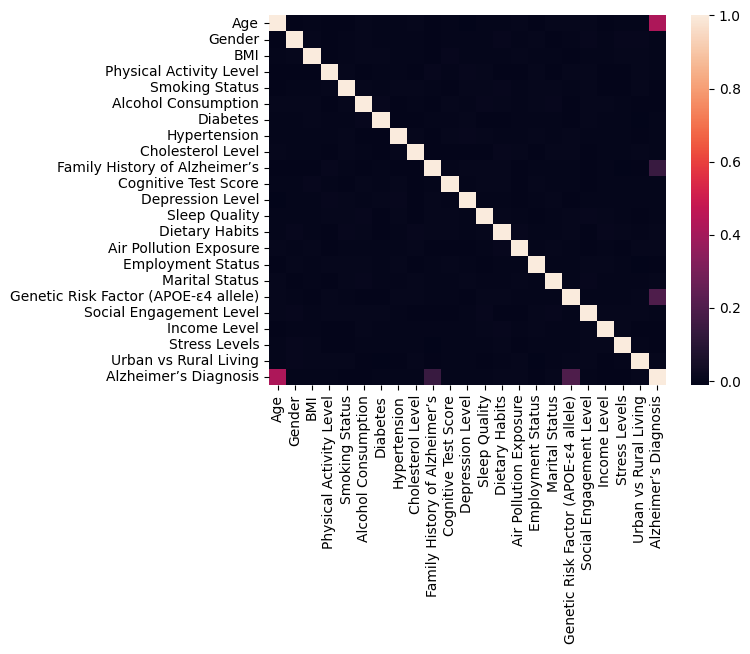

In [100]:
sns.heatmap(corr)

At Alzheimer's diagnoisis it appears that Age, Family History of Alzheimer's and Genetic Risk Factor are the most closely correlated 

In [104]:
mean = df_alz.groupby('Age')['Cognitive Test Score'].mean().reset_index()

std = df_alz.groupby('Age')['Cognitive Test Score'].std().reset_index()

std

,Age,Cognitive Test Score
0,50,20.261800
1,51,20.198235
2,52,19.853237
3,53,19.770036
4,54,20.321610
5,55,19.849885
6,56,20.351060
7,57,19.845801
8,58,20.276641
9,59,20.512923


<Axes: xlabel='Age', ylabel='Cognitive Test Score'>

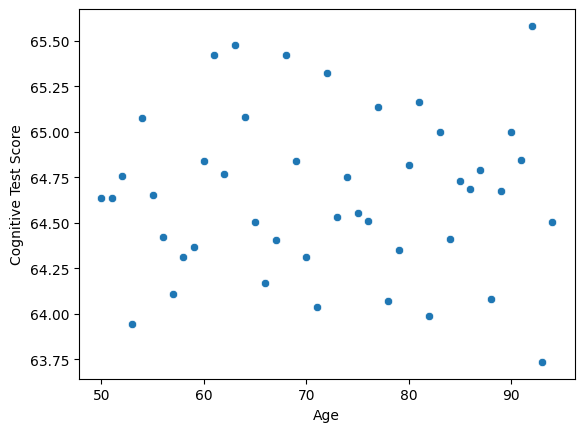

In [107]:
sns.scatterplot(mean, x='Age', y='Cognitive Test Score')


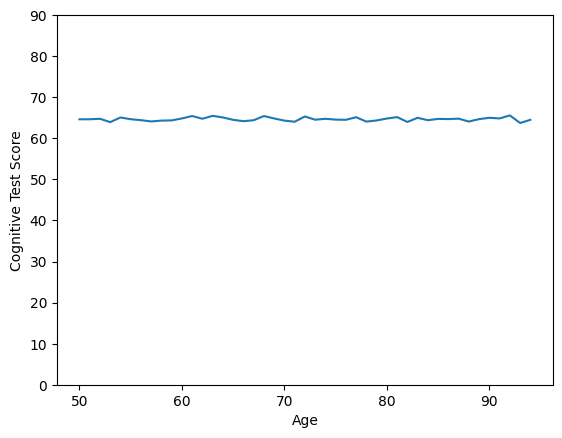

In [108]:
sns.lineplot(mean, x='Age', y='Cognitive Test Score')
plt.yticks(np.arange(0, 100, step=10))
plt.show()

In [123]:
df_ad_age = df_alz.groupby(['Alzheimer’s Diagnosis', 'Age'])[['Cognitive Test Score']].mean().reset_index()
df_ad_age

,Alzheimer’s Diagnosis,Age,Cognitive Test Score
0,No,50,64.651930
1,No,51,64.631616
2,No,52,64.806978
3,No,53,64.007194
4,No,54,65.169165
...,...,...,...
85,Yes,90,65.790868
86,Yes,91,64.579143
87,Yes,92,65.679227
88,Yes,93,63.726201


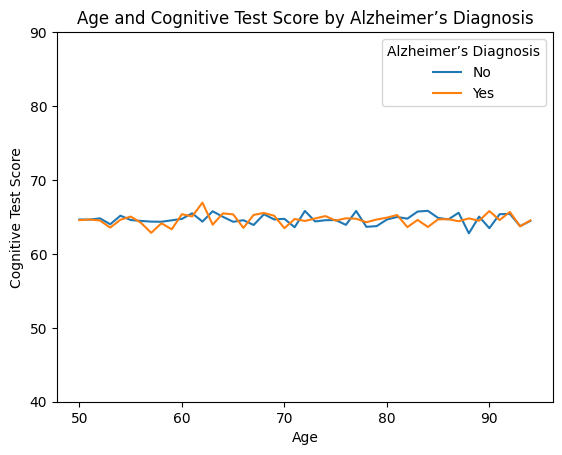

In [ ]:
sns.lineplot(df_ad_age, x='Age', y='Cognitive Test Score', hue='Alzheimer’s Diagnosis')
plt.yticks(np.arange(40, 100, step=10))
plt.title('Age and Cognitive Test Score by Alzheimer’s Diagnosis')
plt.show()

In [132]:
df_ad_fha = df_alz.groupby(['Alzheimer’s Diagnosis', 'Family History of Alzheimer’s'])[['Age', 'Cognitive Test Score']].mean().reset_index()
std = df_alz.groupby(['Alzheimer’s Diagnosis', 'Family History of Alzheimer’s'])[['Age', 'Cognitive Test Score']].std().reset_index()
df_ad_fha['std_age'], df_ad_fha['std_cts'] = std['Age'], std['Cognitive Test Score']

df_ad_fha

,Alzheimer’s Diagnosis,Family History of Alzheimer’s,Age,Cognitive Test Score,std_age,std_cts
0,No,No,67.809792,64.683027,12.318121,20.177686
1,No,Yes,66.094059,64.644498,11.699341,20.020058
2,Yes,No,79.214890,64.671630,10.661439,20.156290
3,Yes,Yes,77.203577,64.552752,11.865607,20.203795


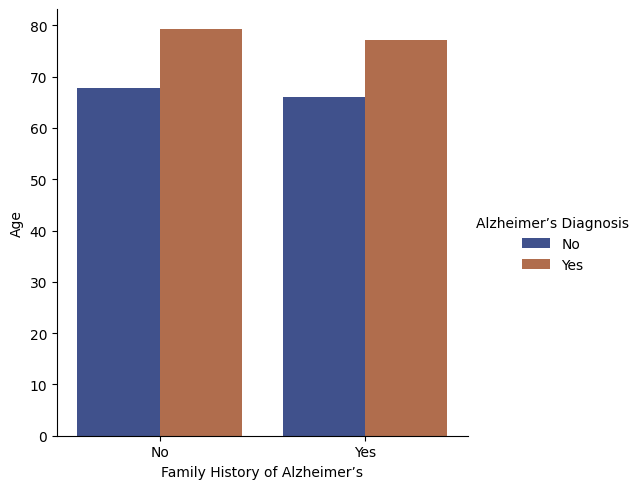

In [135]:
sns.catplot(df_ad_fha, kind='bar', x='Family History of Alzheimer’s', y='Age', hue='Alzheimer’s Diagnosis', palette='dark', alpha=0.8)

In [122]:
df_ad_grf = df_alz.groupby(['Alzheimer’s Diagnosis', 'Genetic Risk Factor (APOE-ε4 allele)'])[['Age', 'Cognitive Test Score']].mean().reset_index()
df_ad_grf

,Alzheimer’s Diagnosis,Genetic Risk Factor (APOE-ε4 allele),Age,Cognitive Test Score
0,No,No,67.724471,64.693919
1,No,Yes,65.197965,64.540955
2,Yes,No,79.253557,64.622855
3,Yes,Yes,76.511823,64.636557


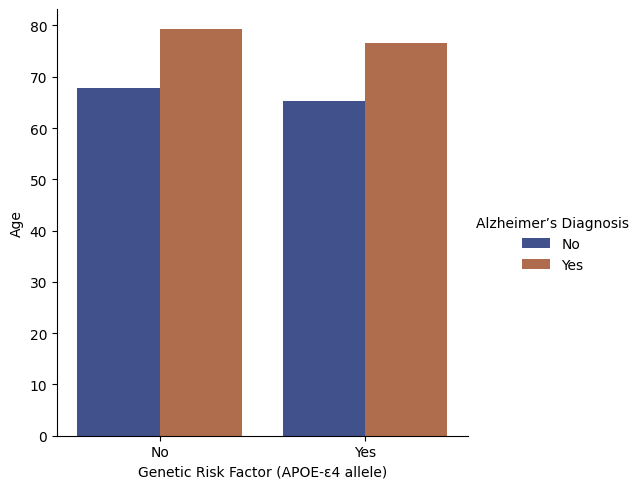

In [136]:
sns.catplot(df_ad_grf, kind='bar', x='Genetic Risk Factor (APOE-ε4 allele)', y='Age', hue='Alzheimer’s Diagnosis', palette='dark', alpha=0.8)

In [138]:
df_ad_country = df[df.loc[:, 'Alzheimer’s Diagnosis'] == "Yes"].loc[:, ['Alzheimer’s Diagnosis', 'Country']]
df_ad_country

,Alzheimer’s Diagnosis,Country
7,Yes,China
11,Yes,UK
13,Yes,India
14,Yes,Italy
20,Yes,Japan
...,...,...
74256,Yes,Mexico
74264,Yes,Saudi Arabia
74268,Yes,Saudi Arabia
74269,Yes,Saudi Arabia


In [153]:
df_country = df_ad_country['Country'].value_counts().reset_index()
df_country

,Country,count
0,Russia,1906
1,India,1883
2,Brazil,1865
3,South Africa,1862
4,Mexico,1744
5,Germany,1564
6,South Korea,1552
7,Australia,1525
8,Saudi Arabia,1517
9,Argentina,1500


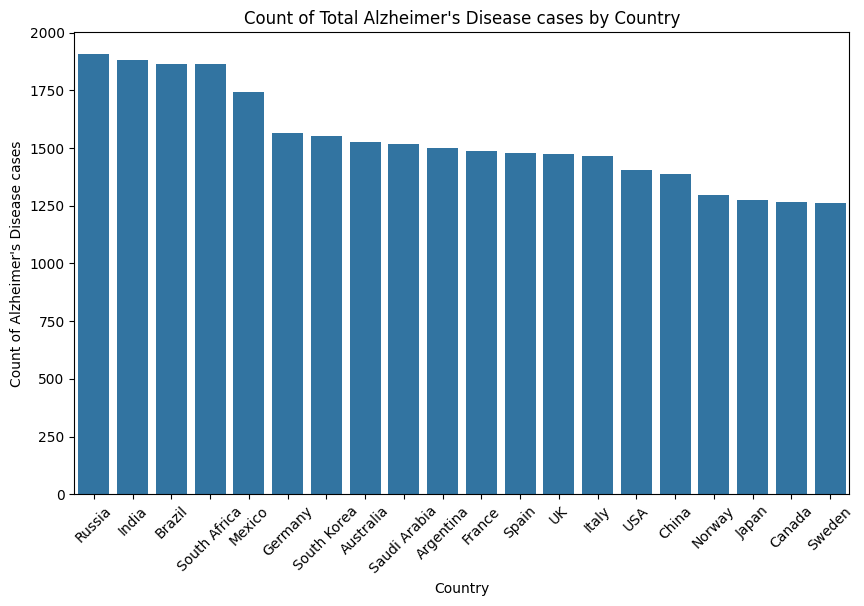

In [157]:
plt.figure(figsize=(10, 6))
sns.barplot(df_country, x='Country', y='count')
plt.xticks(rotation=45)
plt.title("Count of Total Alzheimer's Disease cases by Country")
plt.ylabel("Count of Alzheimer's Disease cases")
plt.show()


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

Logistic Regression <br>
Will use the variables Age, Genetic Risk Factor and Family history

In [162]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [161]:
X = df_alz2[['Age', 'Family History of Alzheimer’s', 'Genetic Risk Factor (APOE-ε4 allele)']]
y = df_alz2['Alzheimer’s Diagnosis']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=623)
print(f'Train set X: {X_train.shape},  Y:{y_train.shape}')
print(f'Test set X: {X_test.shape},  Y:{y_test.shape}')

Train set X: (59426, 3),  Y:(59426,)
Test set X: (14857, 3),  Y:(14857,)


In [168]:
lr = LogisticRegression()

In [169]:
lr.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [172]:
lr.score(X_train, y_train)

0.710042742234039

In [173]:
lr.score(X_test, y_test)

0.7125260819815575